In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

In [71]:
X = 10
Nx = 512
dx = X/Nx
x = np.linspace(-Nx/2,Nx/2,Nx,endpoint=False) * dx
x

array([-5.        , -4.98046875, -4.9609375 , -4.94140625, -4.921875  ,
       -4.90234375, -4.8828125 , -4.86328125, -4.84375   , -4.82421875,
       -4.8046875 , -4.78515625, -4.765625  , -4.74609375, -4.7265625 ,
       -4.70703125, -4.6875    , -4.66796875, -4.6484375 , -4.62890625,
       -4.609375  , -4.58984375, -4.5703125 , -4.55078125, -4.53125   ,
       -4.51171875, -4.4921875 , -4.47265625, -4.453125  , -4.43359375,
       -4.4140625 , -4.39453125, -4.375     , -4.35546875, -4.3359375 ,
       -4.31640625, -4.296875  , -4.27734375, -4.2578125 , -4.23828125,
       -4.21875   , -4.19921875, -4.1796875 , -4.16015625, -4.140625  ,
       -4.12109375, -4.1015625 , -4.08203125, -4.0625    , -4.04296875,
       -4.0234375 , -4.00390625, -3.984375  , -3.96484375, -3.9453125 ,
       -3.92578125, -3.90625   , -3.88671875, -3.8671875 , -3.84765625,
       -3.828125  , -3.80859375, -3.7890625 , -3.76953125, -3.75      ,
       -3.73046875, -3.7109375 , -3.69140625, -3.671875  , -3.65

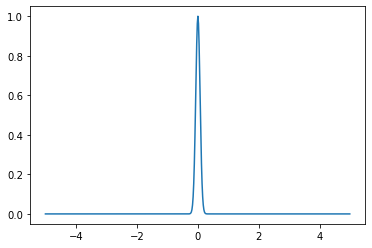

In [85]:
f = 0.005
sigma = 2 * f
amp = 1
gausx = amp * np.exp(-x**2/2/f)
plt.plot(x,gausx)

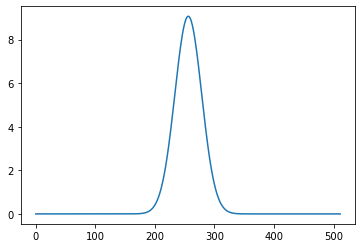

In [86]:
fgausx = fft.fftshift(fft.fft(fft.fftshift(gausx)))
fgausx = np.abs(fgausx)
plt.plot(fgausx)

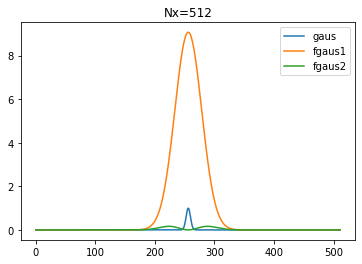

In [87]:
dkx = 2*np.pi/X
kx = np.linspace
sigma1 = 2
# k = 1
k = 1-np.exp(x**2/2/sigma1**2)
plt.plot(gausx,label='gaus')
plt.plot(np.abs(fgausx),label='fgaus1')
plt.plot(np.abs(fgausx*k),label='fgaus2')
plt.legend()
plt.title(f'Nx={Nx}')
plt.show()

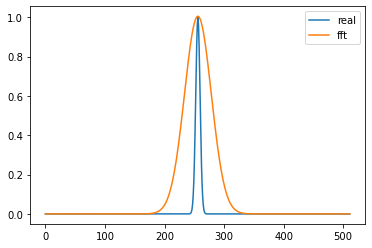

In [132]:
# helpx = fft.fftshift(fft.fft(gausx)) * dx/np.sqrt(2*np.pi) * np.exp((x/dx)**2)
helpx = fft.fftshift(fft.fft(gausx))*  np.sqrt(2*np.pi/Nx) / np.exp(-(x**2)/2 /100000)
helpx = np.abs(helpx)**1
plt.plot(gausx,label='real')
plt.plot(helpx,label='fft')
plt.legend()
plt.show()

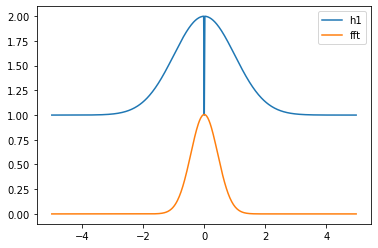

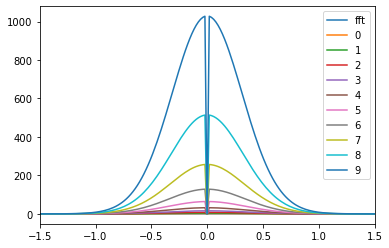

In [233]:
amp = 1
h1 = amp*np.exp(-x**2/2)
h1 += 1
h1[Nx//2] = 1
helpx = fft.fftshift(fft.fft(gausx))*  np.sqrt(2*np.pi/Nx)
helpx = np.abs(helpx)**1
plt.plot(x,h1/amp,label='h1')
plt.plot(x,helpx,label='fft')
plt.legend()
plt.show()

plt.plot(x,helpx,label='fft')
for i in range(10):
    helpx *= h1/(amp)
    plt.plot(x,helpx,label=f'{i}')
plt.legend()
plt.xlim(-1.5,1.5)
plt.show()

No handles with labels found to put in legend.


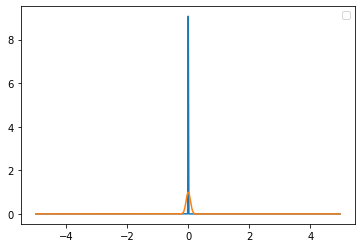

In [234]:
sigma2 = np.abs(sigma**2/(sigma**2 - 1))
x2 = fgausx/amp**2 * np.exp(-x**2/sigma**2)**2
plt.plot(x,x2)
plt.plot(x,gausx)
plt.legend()
# plt.plot(gausx*x2)
# plt.xlim(-0.5,0.5)